In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv(r"C:\Users\preet\Downloads\Machine_Learning-master\Datasets\clustering.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [5]:
df = df.drop("Loan_ID",axis = 1)

In [6]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

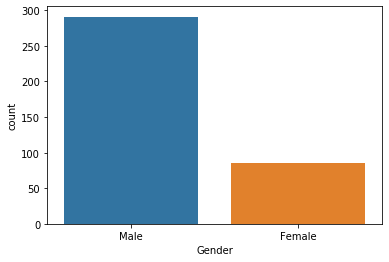

In [7]:
sn.countplot(df.Gender)
            

In [11]:
df.loc[df.Gender=="Male",'Gender'].shape

(296,)

In [12]:
df.Gender.mode()

0    Male
dtype: object

In [13]:
df.Gender= df.Gender.fillna("Male")

In [14]:
df.Dependents.unique() # unique values all be in string so when we fill data we use string in it 

array(['1', '0', '2', '3+', nan], dtype=object)

In [15]:
df.Dependents.mode()

0    0
dtype: object

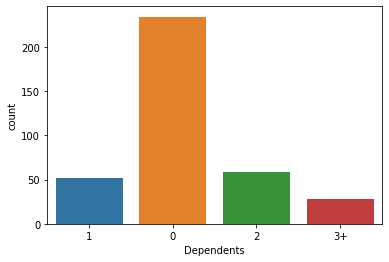

In [16]:
sn.countplot(df.Dependents)

In [18]:
df.Dependents = df.Dependents.fillna("0")

In [19]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

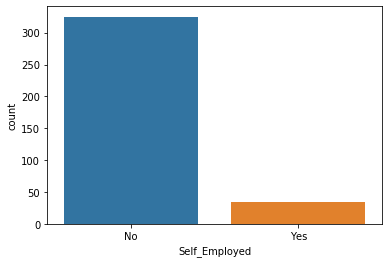

In [20]:
sn.countplot(df.Self_Employed)

In [21]:
df.Self_Employed = df.Self_Employed.fillna(method="ffill")

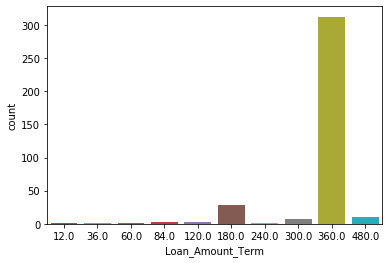

In [22]:
sn.countplot(df.Loan_Amount_Term)

In [23]:
df.Loan_Amount_Term.mode()

0    360.0
dtype: float64

In [24]:
df.Loan_Amount_Term.median()

360.0

In [25]:
df.Loan_Amount_Term.mean()

340.86486486486484

In [26]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(method = 'ffill')

In [27]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df.Credit_History.unique()

array([ 1., nan,  0.])

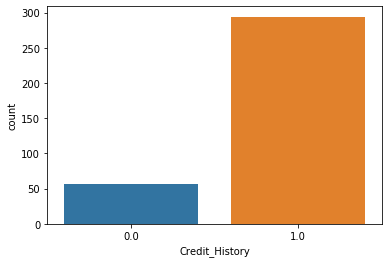

In [29]:
sn.countplot(df.Credit_History )

In [30]:
df.Credit_History = df.Credit_History.fillna(method = "ffill")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
Gender               381 non-null object
Married              381 non-null object
Dependents           381 non-null object
Education            381 non-null object
Self_Employed        381 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     381 non-null float64
Credit_History       381 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [33]:
label = LabelEncoder()

df.Gender = label.fit_transform(df.Gender)

df.Married  = label.fit_transform(df.Married)

df.Dependents = label.fit_transform(df.Dependents )

df.Education = label.fit_transform(df.Education)

df.Self_Employed = label.fit_transform(df.Self_Employed)

df.Property_Area = label.fit_transform(df.Property_Area)


In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y


In [35]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.776903,0.598425,0.666667,0.270341,0.091864,3579.845144,1277.275381,104.986877,341.102362,0.839895,1.052493
std,0.416870,0.490861,0.987643,0.444720,0.289213,1419.813818,2340.818114,28.358464,68.513253,0.367186,0.779592
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2600.000000,0.000000,90.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3333.000000,983.000000,110.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4288.000000,2016.000000,127.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000


In [36]:
x = df.drop("Loan_Status",axis=1)
y = df.Loan_Status


In [37]:
scaler = StandardScaler()
scaled=scaler.fit_transform(x)
scaled

array([[ 0.53587514,  0.81917802,  0.33794768, ...,  0.27618725,
         0.43660623, -1.35183217],
       [ 0.53587514,  0.81917802, -0.67589536, ...,  0.27618725,
         0.43660623,  1.21698607],
       [ 0.53587514,  0.81917802, -0.67589536, ...,  0.27618725,
         0.43660623,  1.21698607],
       ...,
       [-1.86610636, -1.22073588, -0.67589536, ...,  0.27618725,
         0.43660623, -1.35183217],
       [ 0.53587514,  0.81917802,  2.36563375, ..., -2.35449629,
         0.43660623, -1.35183217],
       [-1.86610636, -1.22073588, -0.67589536, ...,  0.27618725,
        -2.29039334, -0.06742305]])

In [38]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state = 0)

In [39]:
x_train.shape

(304, 11)

In [40]:
x_test.shape

(77, 11)

# ELBOW METHOD

In [41]:
Accuracy=[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    yp = knn.predict(x_test)
    Accuracy.append(accuracy_score(y_test,yp))
    

In [42]:
Accuracy

[0.5584415584415584,
 0.5714285714285714,
 0.6753246753246753,
 0.6493506493506493,
 0.7012987012987013,
 0.6103896103896104,
 0.6623376623376623,
 0.6753246753246753,
 0.7142857142857143,
 0.7012987012987013,
 0.6753246753246753,
 0.6753246753246753,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.7012987012987013,
 0.6883116883116883,
 0.7012987012987013,
 0.7012987012987013]

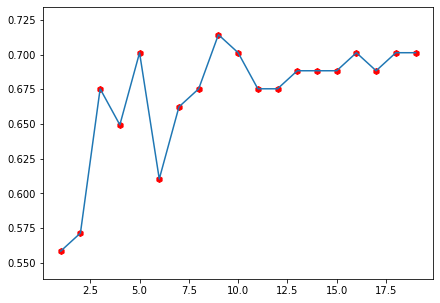

In [43]:
plt.figure(figsize = (7,5))
plt.scatter(range(1,20),Accuracy, marker = "h", color = "r")
plt.plot(range(1,20),Accuracy)

In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [45]:
yp = knn.predict(x_test)
yp

array(['Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [46]:
cm = confusion_matrix(y_test,yp)
cm

array([[ 5, 17],
       [ 5, 50]], dtype=int64)

In [47]:
print(accuracy_score(y_test,yp))

0.7142857142857143


In [48]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           N       0.50      0.23      0.31        22
           Y       0.75      0.91      0.82        55

    accuracy                           0.71        77
   macro avg       0.62      0.57      0.57        77
weighted avg       0.68      0.71      0.67        77



In [49]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
yp1 = clf.predict(x_test)
yp1

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y'],
      dtype=object)

In [51]:
cm = confusion_matrix(y_test,yp1)
cm

array([[10, 12],
       [ 4, 51]], dtype=int64)

In [52]:
print(accuracy_score(y_test,yp1))

0.7922077922077922
